# TASK #1: PROJECT OVERVIEW 


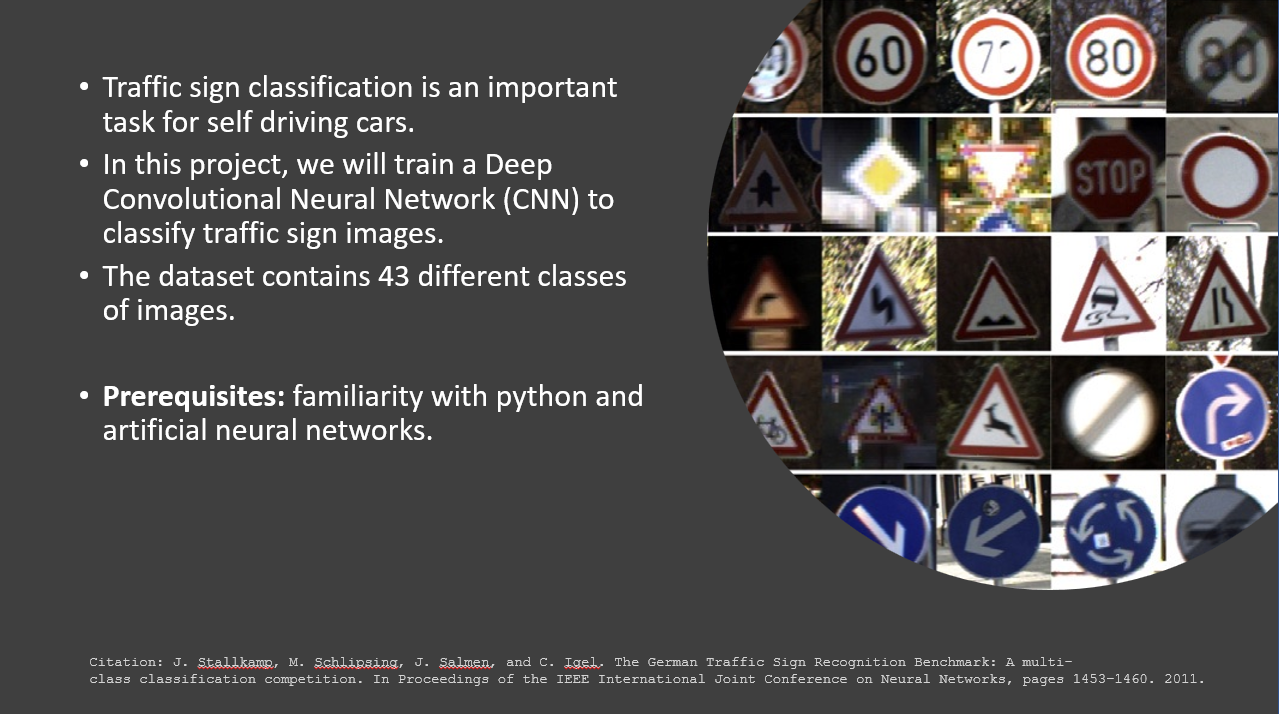

# TASK #2: IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [46]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [47]:
X_train, y_train = train['features'],train['labels']

In [48]:
X_valid, y_valid = valid['features'],valid['labels']


In [49]:
X_test, y_test = test['features'], test['labels']

# TASK #3: PERFORM IMAGES VISUALIZATION

25

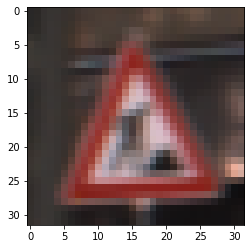

In [50]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

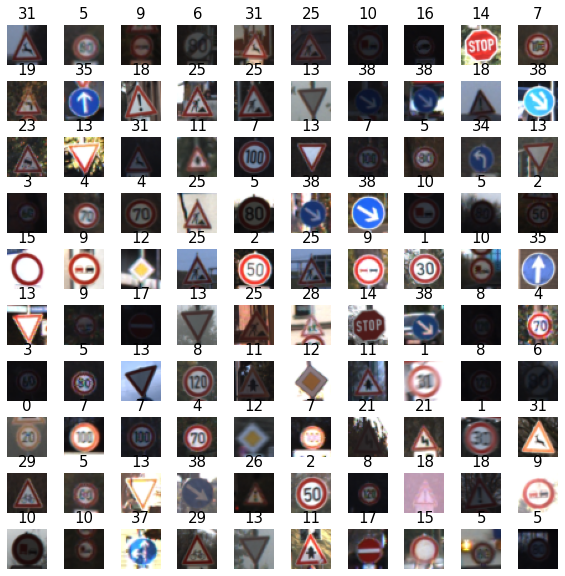

In [51]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize= 15)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace=0.4)

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [52]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [53]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True) #red blue and gree are that 3
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True) #red blue and gree are that 3
X_valid_gray = np.sum(X_valid/3,axis=3,keepdims=True) #red blue and gree are that 3

In [16]:
X_train_gray.shape # 1 is one chaneel that is gray colour

(34799, 32, 32, 1)

In [19]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)
X_valid_gray = np.sum(X_valid/3,axis=3,keepdims=True)

In [54]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128

In [55]:
X_valid_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


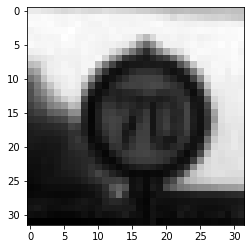

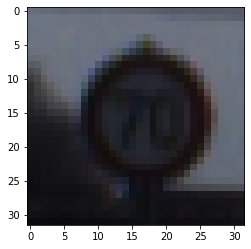

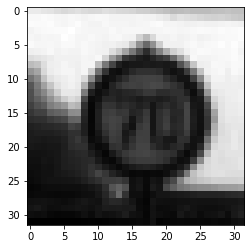

In [56]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.show()

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [61]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_7 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_8 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)              

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [63]:
CNN.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [65]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size=500,
                 epochs=50,
                 verbose=1,
                 validation_data = (X_valid_gray_norm,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 24s 681us/sample - loss: 0.5747 - accuracy: 0.8361 - val_loss: 0.7657 - val_accuracy: 0.7941
Epoch 2/50
34799/34799 [==============================] - 23s 657us/sample - loss: 0.5106 - accuracy: 0.8553 - val_loss: 0.6899 - val_accuracy: 0.8188
Epoch 3/50
34799/34799 [==============================] - 23s 658us/sample - loss: 0.4621 - accuracy: 0.8664 - val_loss: 0.6849 - val_accuracy: 0.8175
Epoch 4/50
34799/34799 [==============================] - 23s 656us/sample - loss: 0.4144 - accuracy: 0.8823 - val_loss: 0.6842 - val_accuracy: 0.8304
Epoch 5/50
34799/34799 [==============================] - 23s 656us/sample - loss: 0.3822 - accuracy: 0.8924 - val_loss: 0.5951 - val_accuracy: 0.8472
Epoch 6/50
34799/34799 [==============================] - 24s 676us/sample - loss: 0.3442 - accuracy: 0.9046 - val_loss: 0.6150 - val_accuracy: 0.8410
Epoch 7/50
34799/34799 [=====================

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

In [66]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 416us/sample - loss: 0.7225 - accuracy: 0.8980
Test Accuracy: 0.8980205655097961


In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [68]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

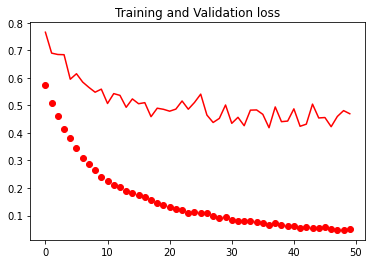

In [69]:
epochs = range(len(accuracy))
plt.plot(epochs,loss,"ro",label='Training loss')
plt.plot(epochs,val_loss,"r",label="My validation Loss")
plt.title("Training and Validation loss")

Text(0.5, 1.0, 'Training and Validation accuracy')

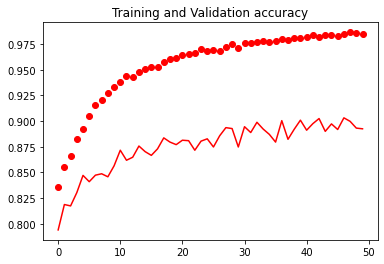

In [70]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,"ro",label='Training accuracy')
plt.plot(epochs,val_accuracy,"r",label="My validation accuracy")
plt.title("Training and Validation accuracy")

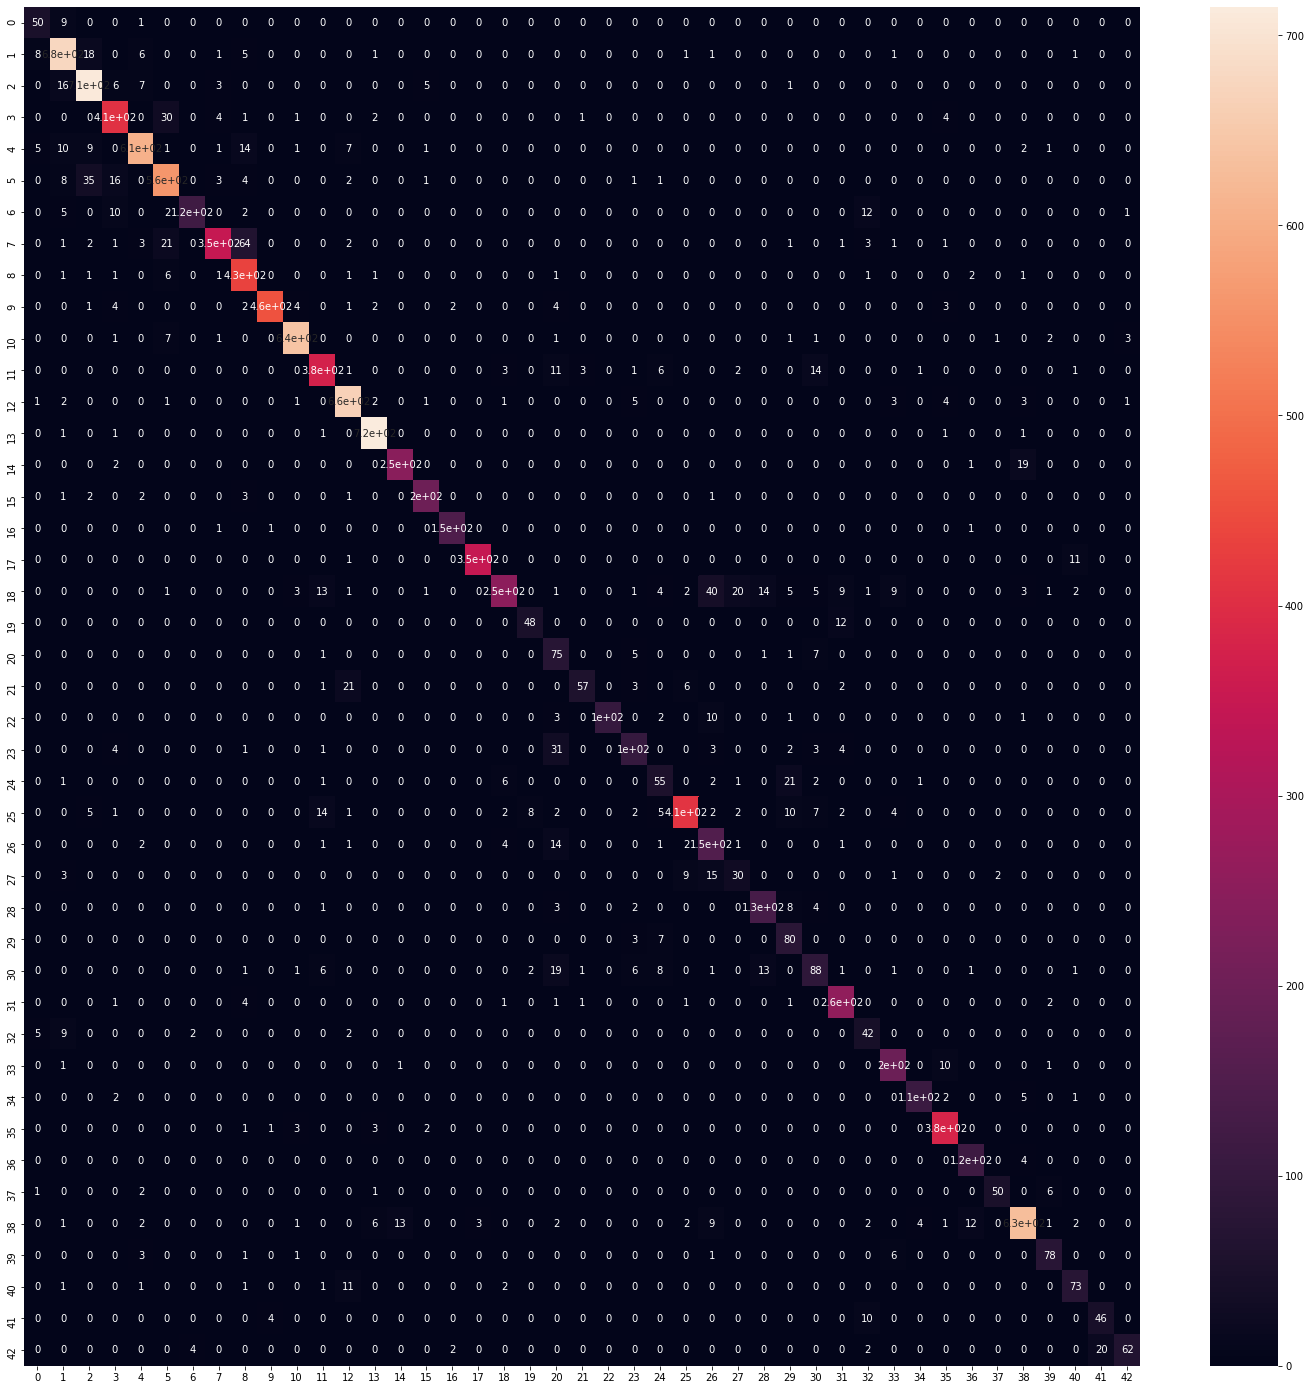

In [71]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

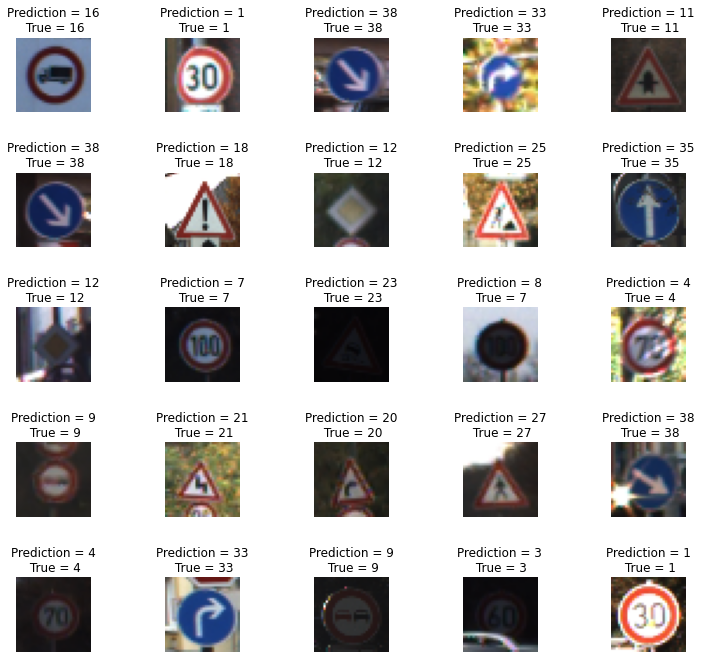

In [72]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons
